Try and find two catgeories that can be combined.

In [1]:
from pathlib import Path
# Load the softmax encodings of the data

from simcoder.similarity import load_mf_encodings

smData = load_mf_encodings(Path('/Volumes/Data/mf_resnet50_softmax'))

# Load the data

allData = load_mf_encodings(Path("/Volumes/Data/mf_dino2")) # load encodings

from simcoder.msedOO import l1_norm

allData = l1_norm(allData)


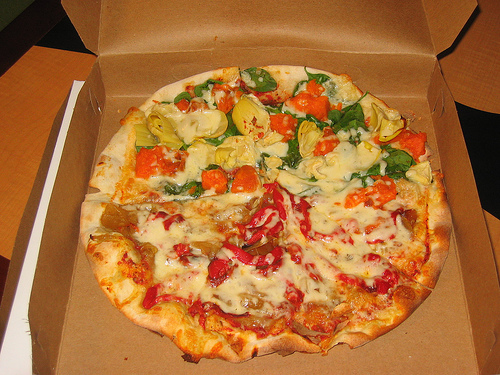

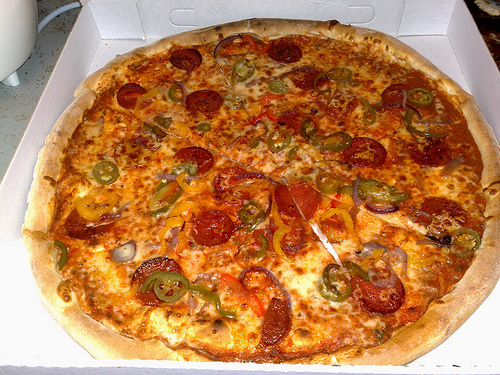

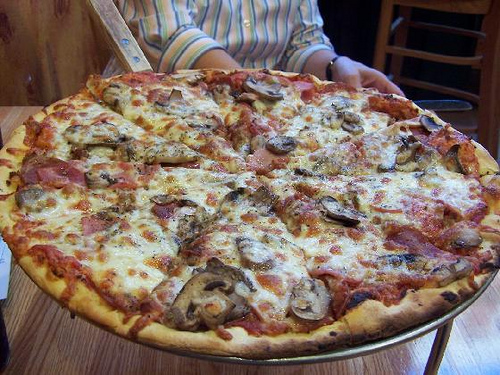

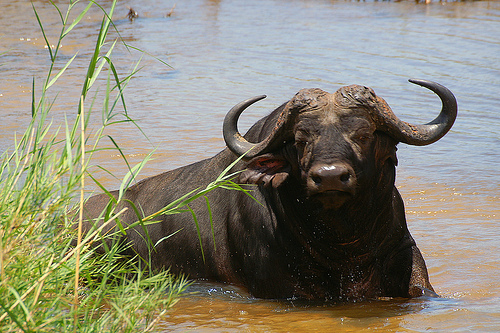

In [2]:
from simcoder.count_cats import get_best_cat_index
from simcoder.similarity import get_mf_image

# subtract 1 from the file numbers

cat1 = 907 # wine bottle
cat2 = 963 # pizza
cat2 = 949 # orange

cat1 = 440 # beer bottle
cat2 = 441 # beer glass


cat1 = 353 # gazelle
cat2 = 291 # lion

cat1 = 963 # pizza
cat2 = 346 # water buffalo

# get a wine bottle and a pizza

indexes_for_cat1 = get_best_cat_index(cat1,smData)
indexes_for_cat2 = get_best_cat_index(cat2,smData)

index1 = indexes_for_cat1[0]
index2 = indexes_for_cat1[1]   # used to use different cats
same_cat_index = indexes_for_cat1[2]

diff_cat_index = indexes_for_cat2[0]

display(get_mf_image(index1))
display(get_mf_image(index2))
display(get_mf_image(same_cat_index))
display(get_mf_image(diff_cat_index))

In [4]:
from simcoder.msedOO import msed
import numpy as np

poly_query_data = np.vstack((allData[index1],allData[index2]))

base = msed(poly_query_data)  # form the base simplex


In [5]:
# measure msed with something in the same cat

similar_data = allData[same_cat_index]
similar_data = np.expand_dims(similar_data, axis=0)

xx = base.msed(similar_data)
print( xx.item() )

# measure msed with something in a different cat

diff_data =  allData[diff_cat_index]
diff_data = np.expand_dims(diff_data, axis=0)

xx = base.msed(diff_data)
print( xx.item() )

# Second number should be much much bigger than the first



0.07442593574523926
0.28027600049972534


In [10]:
complexities =  base.msed(allData)
complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]


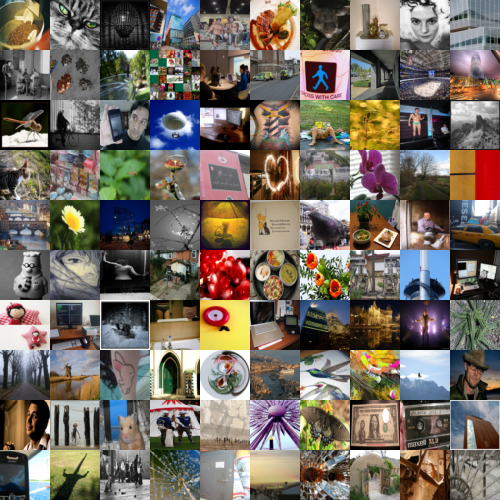

In [11]:
from simcoder.similarity import make_mf_image_grid

make_mf_image_grid(top_100,10,10,50,50)